특정 가설이 사실인지 아닌지 검정하고 싶을때가 있다 예를 들어 이 동전은 앞뒤가 나올 확률이 공정한 동전이다, 데이터 과학자는 R보다 파이썬을 선호한다
등과 같은 주장을 확인하기 위해서는 해당 현상을 관측 한 후 통계치 구한다
해당 통계치는 여러 가정하에 특정 분포에 대한 확률 변수의 관측치로 가정 할 수 있다. 
또한 그런 가정들이 얼마나 타당한지 알 수 있게 해주기도한다.

고전적인 가설 검정에서는 기본적인 가설을의미하는 귀무가설 (H_0, null hypothesis)과 비교하고 싶은 대립가설(H_1, alternative hypothesis)로 구성하면 H_0을 기각할지 말지를 결정한다.

동전이 하나 있다 이동전이 공평한 동전인지 아닌지를 검정 해보자
- H_0 : P = 0.5 (앞면이 나올 확률은 0.5 이다)
- H_1 : P != 0.5 (앞면이 나올 확률은 0.5 가 아니다)

동전을 n 번 던져 앞면이 나온 숫자 X를 세는것으로 것으로 검정을 진행해 보자.
동전 던지기는 각각 베르누이 분포를 따를 것이며
이는 X 가 이항 분포를 따르는 확률 변수라는것을 의미한다.
이항분포는 정규 분포로 근사할 수 있다.

In [1]:
import math

In [47]:
def normal_approximation_to_binomial(n, p):
    """Binomial(n, p) 에 해당되는 mu 와 sigma 계산"""  
    mu = n * p
    sigma = math.sqrt(p * (1 - p) * n)
    return mu, sigma

In [48]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
print(mu_0, sigma_0)

500.0 15.811388300841896


In [20]:
import normal
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

1종 오류 H_0 이 참이지만 기각하는 오류 

유의 수준(significance) 을 결정 해야한다.

유의 수준은 보통 5%나 1%로 설정 1 %로 설정해 보자

In [7]:
lower_bound, upper_bound =  normal.normal_two_sided_bounds(0.95, mu_0, sigma_0)
print(lower_bound, upper_bound)

469.01026640487555 530.9897335951244


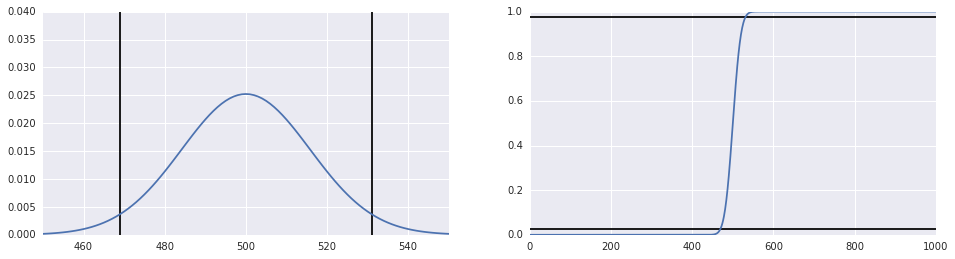

In [44]:
xs = range(1001)
plt.subplots(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(xs, [normal.normal_pdf(x, mu_0, sigma_0) for x in xs], '-')
plt.vlines([lower_bound, upper_bound],0,0.04)
plt.axis([450,550,0.0,0.04])

plt.subplot(1,2,2)
plt.plot(xs, [normal.normal_cdf(x, mu_0, sigma_0) for x in xs], '-')
plt.hlines([normal.normal_cdf(lower_bound, mu_0, sigma_0), normal.normal_cdf(upper_bound, mu_0, sigma_0)], 0, 1000)
plt.show()

제 2종 오류를 범하지 않을 확률을 구하면 검정력(power)을 알 수 있다.

제 2종 오류란 H_0 이 거짓이지만 기각하지 않는 오류이다.

예를 들어 동전이 약간 편향되어 있다면 0.55

In [49]:
lo, hi = normal.normal_two_sided_bounds(0.95, mu_0, sigma_0)
print(lo, hi)

469.01026640487555 530.9897335951244


In [52]:
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)
print(mu_1, sigma_1)

550.0 15.732132722552274


0.11345199870463285


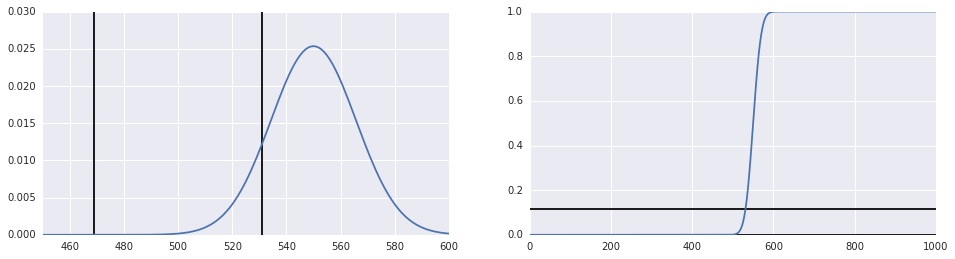

In [66]:
type2_probability = normal.normal_probability_between(lo, hi, mu_1, sigma_1)
print(type2_probability)
plt.subplots(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(xs,[normal.normal_pdf(x, mu_1, sigma_1) for x in xs])
plt.axis([mu_1 - 100, mu_1 + 50,0, 0.03])
plt.vlines([lo, hi], 0, 0.03)

plt.subplot(1,2,2)
plt.plot(xs, [normal.normal_cdf(x, mu_1, sigma_1) for x in xs])
plt.hlines([normal.normal_cdf(x, mu_1, sigma_1) for x in [lo, hi]], 0, 1000)

plt.show()

In [67]:
power = 1 - type2_probability
print(power)

0.8865480012953671
